## Data Preparation

### 1. Loading the Dataset

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

In [3]:
# Display the first few rows
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B


### 2. Initial Data Inspection

In [4]:
# Check the structure and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   BMI                  4750 non-null   float64
 2   BloodPressure        4750 non-null   float64
 3   Cholesterol          4750 non-null   float64
 4   Glucose              5000 non-null   int64  
 5   Insulin              5000 non-null   int64  
 6   HeartRate            5000 non-null   int64  
 7   Smoker               5000 non-null   int64  
 8   PhysicalActivity     5000 non-null   object 
 9   SleepTime            5000 non-null   int64  
 10  MedicalHistoryScore  5000 non-null   int64  
 11  IncomeLevel          5000 non-null   object 
 12  StressLevel          5000 non-null   object 
 13  HealthIns            5000 non-null   object 
 14  Disease              3742 non-null   object 
dtypes: float64(3), int64(7), object(5)
mem

In [5]:
# Display basic statistical information
df.describe

<bound method NDFrame.describe of       Age        BMI  BloodPressure  Cholesterol  Glucose  Insulin  HeartRate  \
0      56  27.577099           88.0        108.0       92      171         75   
1      69  26.233744           88.0        252.0      102      179         71   
2      46  29.646620          152.0        141.0       89      198         90   
3      32  30.619597          106.0        273.0      159      222         64   
4      60  16.794395           96.0        172.0      173       30         99   
...   ...        ...            ...          ...      ...      ...        ...   
4995   42  32.859689          174.0        140.0      107      248         90   
4996   39  37.916078          113.0        184.0      180      200         98   
4997   48  32.637416          143.0        188.0       82       77         61   
4998   34  31.794482          108.0        141.0       76      117         71   
4999   72  24.858529           82.0        219.0      136      203         

### 3. Handling Missing Values

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Check for missing values
df.isnull().sum()

Age                       0
BMI                     250
BloodPressure           250
Cholesterol             250
Glucose                   0
Insulin                   0
HeartRate                 0
Smoker                    0
PhysicalActivity          0
SleepTime                 0
MedicalHistoryScore       0
IncomeLevel               0
StressLevel               0
HealthIns                 0
Disease                1258
dtype: int64

In [8]:
# Fill missing values with the mean
df["BMI"].fillna(df["BMI"].mean(), inplace=True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace=True)
df["Cholesterol"].fillna(df["Cholesterol"].mean(), inplace=True)

In [9]:
# Fill missing values ​​with 'None'
df["Disease"].fillna("Disease_None", inplace=True)

In [10]:
# Health risk score (a simple formula)
df["HealthRiskScore"] = df["Age"] / df["BMI"]

In [11]:
# Check for missing values again
df.isnull().sum()

Age                    0
BMI                    0
BloodPressure          0
Cholesterol            0
Glucose                0
Insulin                0
HeartRate              0
Smoker                 0
PhysicalActivity       0
SleepTime              0
MedicalHistoryScore    0
IncomeLevel            0
StressLevel            0
HealthIns              0
Disease                0
HealthRiskScore        0
dtype: int64

In [12]:
df.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,Smoker,PhysicalActivity,SleepTime,MedicalHistoryScore,IncomeLevel,StressLevel,HealthIns,Disease,HealthRiskScore
0,56,27.577099,88.0,108.0,92,171,75,0,Medium,9,5,High,Low,No,Disease_B,2.030670
1,69,26.233744,88.0,252.0,102,179,71,0,High,9,3,High,Medium,Yes,Disease_A,2.630200
2,46,29.646620,152.0,141.0,89,198,90,1,Low,5,5,Medium,Medium,No,Disease_C,1.551610
3,32,30.619597,106.0,273.0,159,222,64,1,Medium,7,0,Medium,High,No,Disease_C,1.045082
4,60,16.794395,96.0,172.0,173,30,99,1,Low,7,3,High,Medium,No,Disease_B,3.572620


### 4. Exploratory Data Analysis (EDA)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Visualize the distributions of numerical features
numerical_features = ["Age", "BMI", "BloodPressure", "Cholesterol", "Glucose", "Insulin", "HeartRate", "SleepTime", "MedicalHistoryScore"]

C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tayla\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

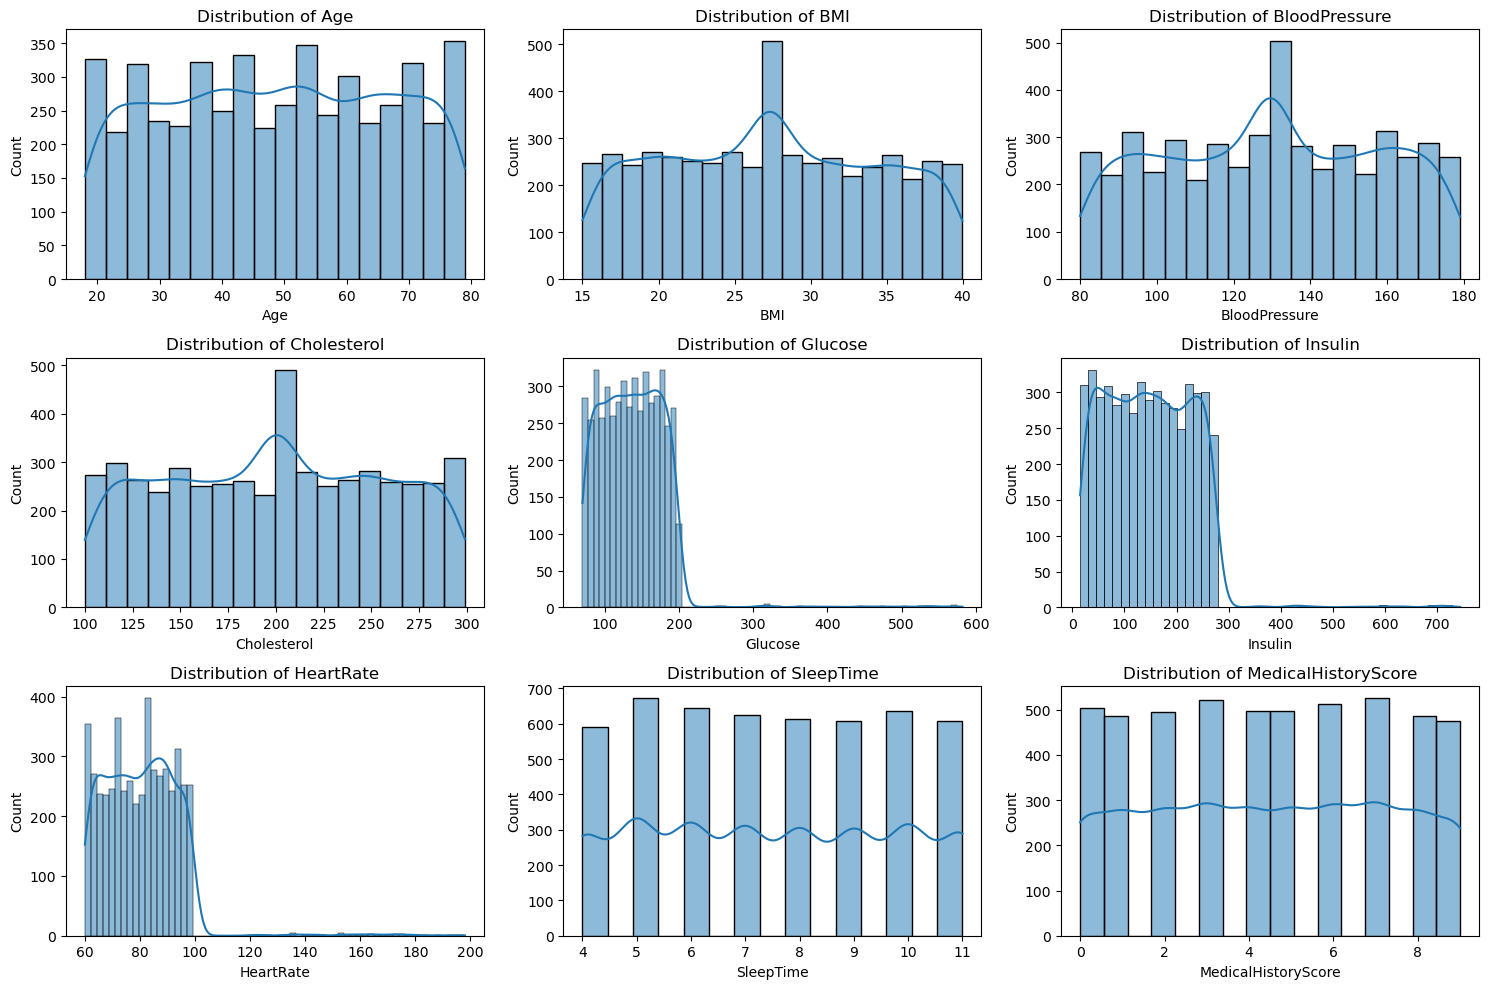

In [15]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

In [16]:
# Visualize the distributions of categorical features
categorical_features = ["Smoker", "PhysicalActivity", "IncomeLevel", "StressLevel", "HealthIns", "Disease"]

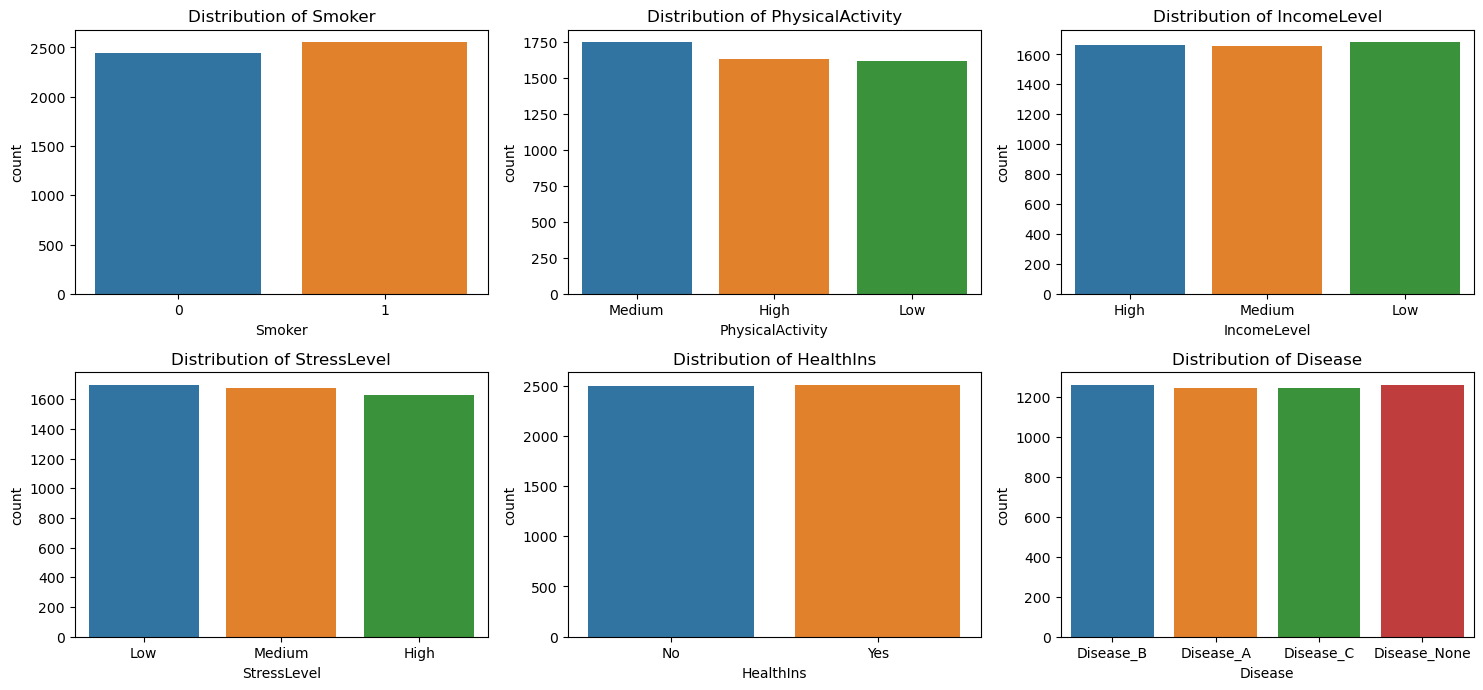

In [17]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[feature])
    plt.title(f"Distribution of {feature}")
    
plt.tight_layout()
plt.show()

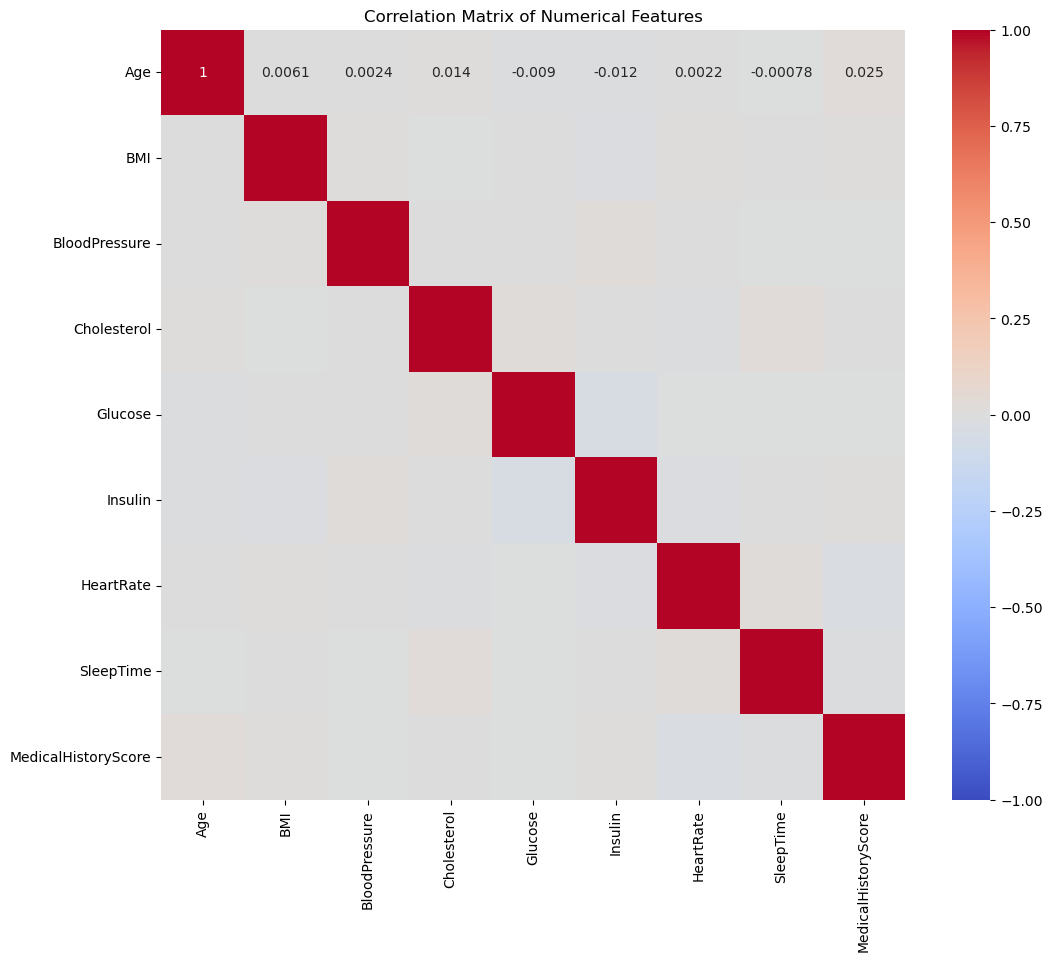

In [18]:
# Explore relationships between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### 5. Feature Engineering

In [19]:
# Apply one-hot encoding for categorical variables
categorical_df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

In [20]:
# Adding the new features to the original data set
df_encoded = pd.concat([df[numerical_features], categorical_df_encoded], axis=1)

In [21]:
# Show the first few rows of the new data set
df_encoded.head()

,Age,BMI,BloodPressure,Cholesterol,Glucose,Insulin,HeartRate,SleepTime,MedicalHistoryScore,Smoker,PhysicalActivity_Low,PhysicalActivity_Medium,IncomeLevel_Low,IncomeLevel_Medium,StressLevel_Low,StressLevel_Medium,HealthIns_Yes,Disease_Disease_B,Disease_Disease_C,Disease_Disease_None
0,56,27.577099,88.0,108.0,92,171,75,9,5,0,False,True,False,False,True,False,False,True,False,False
1,69,26.233744,88.0,252.0,102,179,71,9,3,0,False,False,False,False,False,True,True,False,False,False
2,46,29.646620,152.0,141.0,89,198,90,5,5,1,True,False,False,True,False,True,False,False,True,False
3,32,30.619597,106.0,273.0,159,222,64,7,0,1,False,True,False,True,False,False,False,False,True,False
4,60,16.794395,96.0,172.0,173,30,99,7,3,1,True,False,False,False,False,True,False,True,False,False


### 6. Dimensionality Reduction

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [23]:
# Scaling numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded[numerical_features])

In [24]:
# Apply PCA 
pca = PCA(n_components=2)  # İlk iki ana bileşeni al
pca_result = pca.fit_transform(scaled_features)

In [25]:
pca_result

array([[ 0.65292217,  0.44468907],
       [ 0.20879937, -0.65484226],
       [ 1.12565829,  1.02051667],
       ...,
       [ 0.47440009,  0.38875755],
       [ 0.59777325,  1.19574151],
       [ 0.54304971, -0.28940287]])

In [26]:
# Apply LDA
target = df_encoded[['Disease_Disease_B', 'Disease_Disease_C', 'Disease_Disease_None']].idxmax(axis=1)
lda = LDA(n_components=2)
lda_result = lda.fit_transform(scaled_features, target)

In [27]:
lda_result

array([[-0.18011013, -0.56771683],
       [-0.94405835, -1.1542657 ],
       [ 1.35910662,  0.33580674],
       ...,
       [ 0.97727384, -1.75719521],
       [ 1.35782607, -1.04325682],
       [ 0.11173682, -2.12882422]])

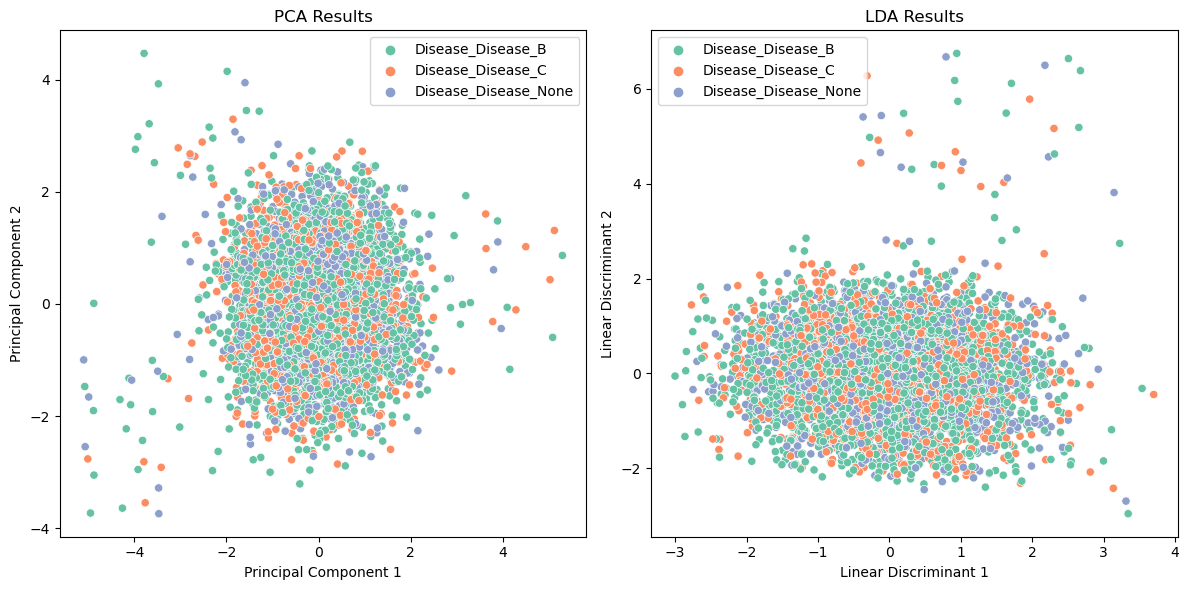

In [28]:
plt.figure(figsize=(12, 6))

# Visualization of PCA results
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=target, palette='Set2')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualization of LDA results
plt.subplot(1, 2, 2)
sns.scatterplot(x=lda_result[:, 0], y=lda_result[:, 1], hue=target, palette='Set2')
plt.title('LDA Results')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')

plt.tight_layout()
plt.show()

## Machine Learning

### 1. Define the Problem

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# Separating target and arguments
X = df_encoded.drop(['Disease_Disease_B', 'Disease_Disease_C', 'Disease_Disease_None'], axis=1)
y = target

### 2. Separating Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Split the data set into training and testing sets (e.g. 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 17) (1500, 17) (3500,) (1500,)


### 3. Model Selection and Training

#### Random Forest Model

In [34]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Making predictions on the Random Forest model test set
rf_predictions = rf_model.predict(X_test)

In [36]:
# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

In [37]:
rf_accuracy

0.4673333333333333

In [38]:
rf_report

'                      precision    recall  f1-score   support\n\n   Disease_Disease_B       0.48      0.94      0.64       732\n   Disease_Disease_C       0.12      0.01      0.02       380\nDisease_Disease_None       0.23      0.03      0.05       388\n\n            accuracy                           0.47      1500\n           macro avg       0.28      0.33      0.24      1500\n        weighted avg       0.33      0.47      0.33      1500\n'

#### Logistic Regression Model

In [39]:
# Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [40]:
# Making predictions on the Logistic Regression model test set
lr_predictions = lr_model.predict(X_test)

In [41]:
# Calculate performance metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_report = classification_report(y_test, lr_predictions)

C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
lr_accuracy

0.488

In [43]:
lr_report

'                      precision    recall  f1-score   support\n\n   Disease_Disease_B       0.49      1.00      0.66       732\n   Disease_Disease_C       0.00      0.00      0.00       380\nDisease_Disease_None       0.00      0.00      0.00       388\n\n            accuracy                           0.49      1500\n           macro avg       0.16      0.33      0.22      1500\n        weighted avg       0.24      0.49      0.32      1500\n'

### 4. Finding the best hyperparameter with GridSearch

In [44]:
from sklearn.model_selection import GridSearchCV

#### Random Forest Model

In [45]:
# Hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

In [46]:
# Finding the best hyperparameters for Random Forest model with GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [47]:
# Best parameters and scores
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

In [48]:
rf_best_params

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

In [49]:
rf_best_score

0.5051428571428571

#### Logistic Regression Model

In [50]:
# Hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

In [51]:
# Finding the best hyperparameters for Logistic Regression model with GridSearchCV
lr_grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_param_grid, cv=5, scoring='accuracy', verbose=1)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [52]:
# Best parameters and scores
lr_best_params = lr_grid_search.best_params_
lr_best_score = lr_grid_search.best_score_

In [53]:
lr_best_params

{'C': 0.01, 'solver': 'liblinear'}

In [54]:
lr_best_score

0.5051428571428571

### 5. K-Fold Cross-Validation

In [55]:
from sklearn.model_selection import cross_val_score, cross_validate

In [56]:
# Sets for 10x cross length
cv = 10

#### Random Forest Model

In [57]:
# Cross validation for Random Forest
rf_cv_results = cross_validate(RandomForestClassifier(random_state=42), X, y, cv=cv, scoring='accuracy', return_train_score=True)

In [58]:
# Average accuracy scores of cross-validation results
rf_cv_accuracy = rf_cv_results['test_score'].mean()

In [59]:
rf_cv_accuracy

0.4906

#### Logistic Regression Model

In [60]:
# Cross validation for Logistic Regression
lr_cv_results = cross_validate(LogisticRegression(max_iter=1000, random_state=42), X, y, cv=cv, scoring='accuracy', return_train_score=True)

C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\tayla\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [61]:
# Average accuracy scores of cross-validation results
lr_cv_accuracy = lr_cv_results['test_score'].mean()

In [62]:
lr_cv_accuracy

0.5

### 6. Comparison of Model Results

#### RandomForestClassifier vs LogisticRegression

In [63]:
# Compare the results of the models
Results = {
    "Model": ["RandomForestClassifier", "LogisticRegression"],
    "Accuracy": [rf_accuracy, lr_accuracy]
}

In [64]:
Results_df = pd.DataFrame(Results)

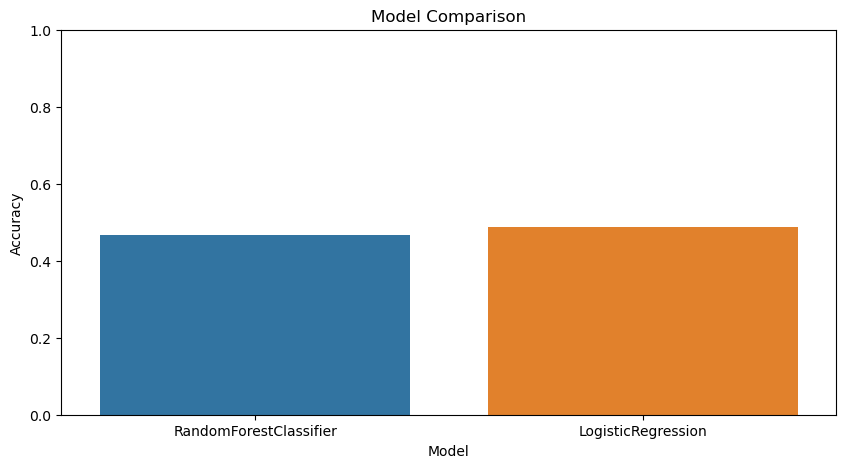

In [65]:
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=Results_df)
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.show()

#### GridSearch RandomForestClassifier vs LogisticRegression

In [66]:
# Compare the results of the models
GridResults = {
    "Model": ["RandomForestClassifier", "LogisticRegression"],
    "Accuracy": [rf_best_score, lr_best_score]
}

In [67]:
GridResults_df = pd.DataFrame(GridResults)

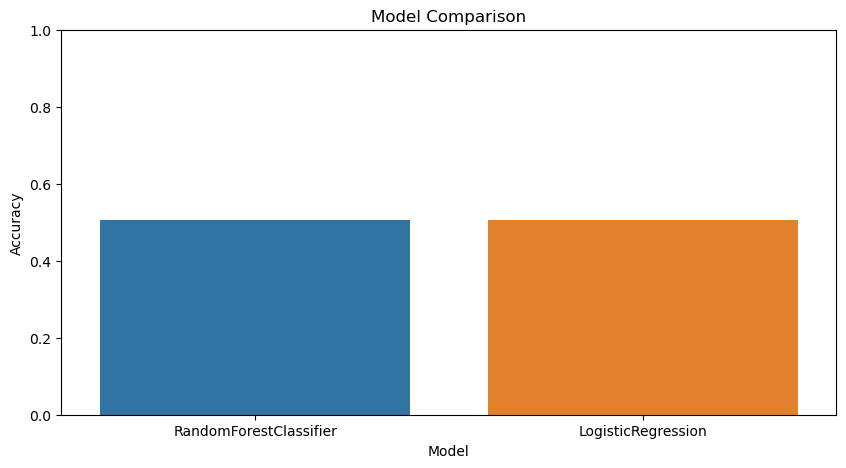

In [68]:
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=GridResults_df)
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.show()

#### K-Fold Cross RandomForestClassifier vs LogisticRegression

In [69]:
# Compare the results of the models
CvResults = {
    "Model": ["RandomForestClassifier", "LogisticRegression"],
    "Accuracy": [rf_cv_accuracy, lr_cv_accuracy]
}

In [70]:
CvResults_df = pd.DataFrame(CvResults)

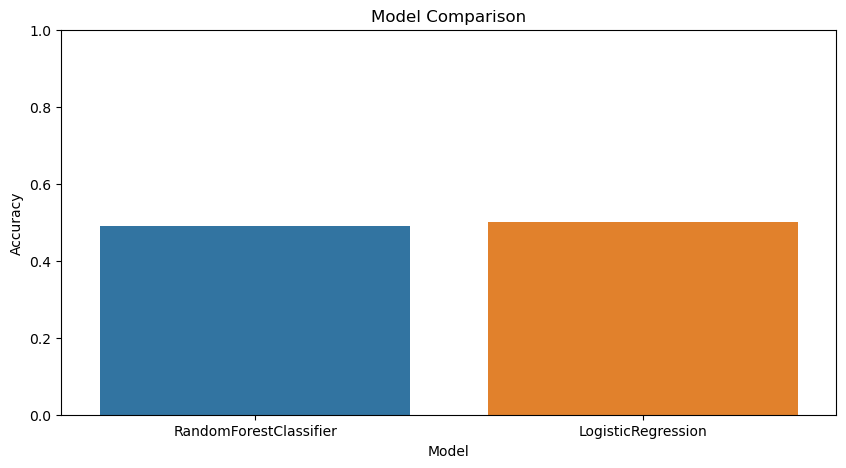

In [71]:
# Visualize the results
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=CvResults_df)
plt.ylim(0, 1)
plt.title("Model Comparison")
plt.show()